# Support Vector Machine (SVM)

## Importing the libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Importing the dataset

In [9]:
from sklearn import datasets

new = datasets.load_diabetes()
print(new)
X = new.data[:, [2, 8]]  # Feature 2: BMI, Feature 8: S5 (blood serum measurement)
y = new.target


{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

## Exploratory Data Analysis
###  Place the diabetes data into a pandas dataframe

In [11]:
new = datasets.load_digits()
X = new.data[:, [10, 20]]  # Selecting two pixel features
y = new.target

# Create a DataFrame with column names representing pixel indices
digits_df = pd.DataFrame(X, columns=['pixel_10', 'pixel_20'])

# View the first 5 rows of the data
print(digits_df.head())

# Print the unique labels of the dataset
print('\nThe unique labels in this data are ' + str(np.unique(y)))


   pixel_10  pixel_20
0      13.0       0.0
1       0.0      16.0
2       3.0       8.0
3      13.0      13.0
4       0.0       6.0

The unique labels in this data are [0 1 2 3 4 5 6 7 8 9]


## Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))


There are 1257 samples in the training set and 540 samples in the test set


## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('After standardizing our features, the first 5 rows of our data now look like this:\n')
print(pd.DataFrame(X_train_std, columns=iris_df.columns).head())


After standardizing our features, the first 5 rows of our data now look like this:

   petal length (cm)  petal width (cm)
0           0.478495          0.141990
1           1.026780          1.428342
2          -1.714644         -0.983568
3          -0.800836         -0.661980
4           0.661257         -1.144362


## Plot the original Data

C:\Users\Admin\AppData\Local\Temp\ipykernel_34252\673965287.py:12: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


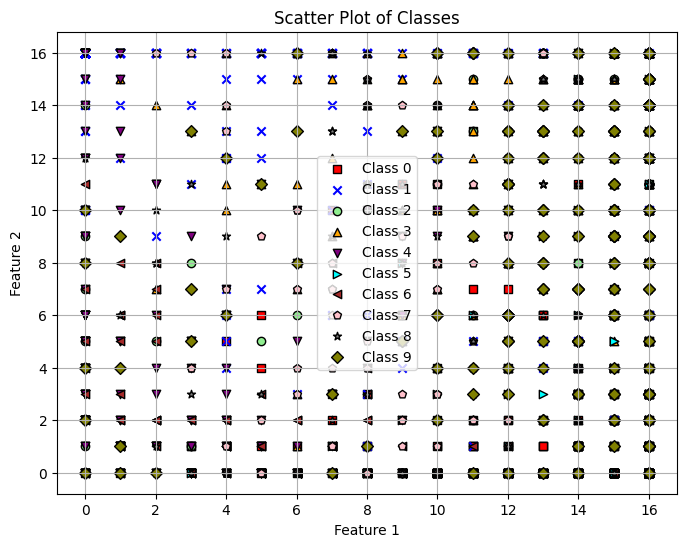

In [16]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

# Assume X and y are defined
markers = ('s', 'x', 'o', '^', 'v', '>', '<', 'p', '*', 'D')  # Add more if needed
colors = ('red', 'blue', 'lightgreen', 'orange', 'purple', 'cyan', 'brown', 'pink', 'gray', 'olive')
cmap = ListedColormap(colors)

plt.figure(figsize=(8, 6))
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(
        x=X[y == cl, 0], 
        y=X[y == cl, 1],
        color=colors[idx % len(colors)],  # Safe color cycling
        marker=markers[idx % len(markers)],  # Safe marker cycling
        label=f'Class {cl}', 
        edgecolor='k' if markers[idx % len(markers)] != 'x' else 'none'  # avoid warning
    )

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Classes")
plt.legend()
plt.grid(True)
plt.show()


### If we plot the original data, we can see that one of the classes is linearly separable, but the other two are not.

## Training the SVM model on the Training set

In [17]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)


SVC(gamma=0.1, random_state=0)

### Dispplay the support Vectors of model

In [18]:
print("Support Vector for model are :",svm.support_vectors_)

Support Vector for model are : [[ 0.84401829  0.46357804]
 [ 0.66125671 -0.66198024]
 [-0.61807438 -0.66198024]
 ...
 [ 1.02677988  0.302784  ]
 [ 0.47849512  0.78516612]
 [ 0.84401829  0.94596016]]


In [19]:
print("Number of suppoort Vectors of each class 0 : - ",svm.n_support_[0])
print("Number of suppoort Vectors of each class 1 : - ",svm.n_support_[1])
print("Number of suppoort Vectors of each class 2 : - ",svm.n_support_[2])

Number of suppoort Vectors of each class 0 : -  133
Number of suppoort Vectors of each class 1 : -  78
Number of suppoort Vectors of each class 2 : -  120


In [20]:
print("Indices for support vectors are : ",svm.support_)

Indices for support vectors are :  [  14   18   39 ... 1212 1229 1232]


## Finding Accuracy of model on Test and Train Set

In [21]:
print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train_std, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test_std, y_test)))

The accuracy of the svm classifier on training data is 0.39 out of 1
The accuracy of the svm classifier on test data is 0.35 out of 1


## Finding Accuracy of model on using confiusion matrix

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, svm.predict(X_test_std))
print(cm)


[[ 6  0  0  3  0 21 10  1  0  4]
 [ 0 33  0  9  6  0  0  3  0  1]
 [ 0  2 30  6  3  3  3  2  0  4]
 [ 1  7 25 13  0  6  0  2  0  0]
 [ 0  7  0  3 19  2 15  2  0  0]
 [ 8  0  3  0  1 34  4  1  0  6]
 [ 7  0  0  0 13  0 40  0  0  0]
 [ 5  8  5 10  5  2  9  4  0  5]
 [ 0  6 14  8  3 13  4  2  0 11]
 [ 4  2 19  8  2  6  1  4  0 11]]


In [25]:
from sklearn import metrics

# Predictions
y_pred = svm.predict(X_test_std)

# Core Metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='macro')
recall = metrics.recall_score(y_test, y_pred, average='macro')  # aka sensitivity
f1 = metrics.f1_score(y_test, y_pred, average='macro')

# Specificity (manually computed per class from confusion matrix)
import numpy as np
cm = metrics.confusion_matrix(y_test, y_pred)
specificity_per_class = []
for i in range(len(cm)):
    tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
    fp = cm[:, i].sum() - cm[i, i]
    specificity = tn / (tn + fp)
    specificity_per_class.append(specificity)
specificity = np.mean(specificity_per_class)  # macro-average specificity

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.3519
Precision: 0.2904
Recall (Sensitivity): 0.3502
Specificity: 0.9280
F1 Score: 0.3083


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
print({
    "Accuracy": accuracy,
    "Precision": precision,
    "Sensitivity_recall": recall,
    "Specificity": specificity,
    "F1_score": f1
}, end="")


{'Accuracy': 0.35185185185185186, 'Precision': 0.2904093805992233, 'Sensitivity_recall': 0.3502172576862249, 'Specificity': np.float64(0.927996260103083), 'F1_score': 0.308324979817366}

## Create the function for Visualizing Testing and Training model

In [28]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
plt.show()


## Visualising the Train set results

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Extended markers and colors to support more classes
    markers = ('s', 'x', 'o', '^', 'v', '>', '<', 'p', '*', 'D',
               'h', 'H', '+', '1', '2', '3', '4', '|', '_')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan', 'orange',
              'purple', 'pink', 'olive', 'brown', 'gold', 'teal',
              'coral', 'lime', 'navy', 'magenta', 'maroon', 'turquoise', 'chocolate')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Mesh grid
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    # Plot contour
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class data points
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    color=colors[idx % len(colors)],
                    marker=markers[idx % len(markers)],
                    label=f'Class {cl}',
                    edgecolor='k')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title('Decision Regions')
    plt.grid(True)
    plt.show()


## Visualising the Test set results

C:\Users\Admin\AppData\Local\Temp\ipykernel_34252\3420482309.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


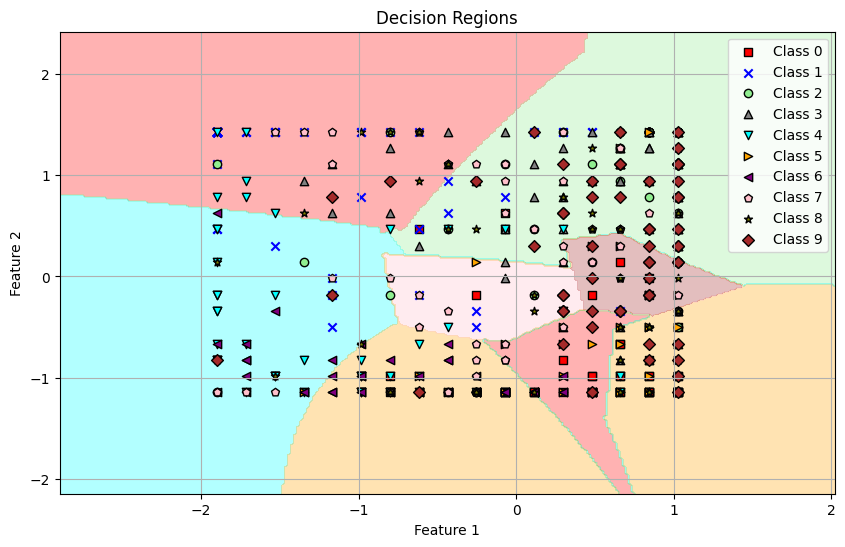

In [33]:
plot_decision_regions(X_test_std, y_test, svm)